In [1]:
import glob
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 1

/home/vedu_x/miniconda3/envs/DataScience/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
sns.set(rc={'figure.figsize':(11, 4)})


In [4]:
files = "data/cleaned_data"


df = pd.read_csv(files+"/2020-01-21mod.csv.gz")

#print(data_files)
df.head()
df.dtypes

CreatedAt          object
CreatedAt_Full     object
Epoch_Time        float64
TweetID             int64
UserID              int64
Handle             object
Followers           int64
Friends             int64
Hashtags           object
Retweeted          object
Retweeted_ID      float64
Text               object
Year                int64
month               int64
day                 int64
date               object
dtype: object

In [5]:
data_files = glob.glob(files+"/*.csv.gz")
print(data_files)

['data/cleaned_data/2020-03-27mod.csv.gz', 'data/cleaned_data/2020-03-21mod.csv.gz', 'data/cleaned_data/2020-02-08mod.csv.gz', 'data/cleaned_data/2020-02-22mod.csv.gz', 'data/cleaned_data/2020-03-03mod.csv.gz', 'data/cleaned_data/2020-03-01mod.csv.gz', 'data/cleaned_data/2020-02-17mod.csv.gz', 'data/cleaned_data/2020-03-09mod.csv.gz', 'data/cleaned_data/2020-01-25mod.csv.gz', 'data/cleaned_data/2020-03-06mod.csv.gz', 'data/cleaned_data/2020-01-21mod.csv.gz', 'data/cleaned_data/2020-03-30mod.csv.gz', 'data/cleaned_data/2020-03-12mod.csv.gz', 'data/cleaned_data/2020-02-14mod.csv.gz', 'data/cleaned_data/2020-03-17mod.csv.gz', 'data/cleaned_data/2020-03-08mod.csv.gz', 'data/cleaned_data/2020-01-26mod.csv.gz', 'data/cleaned_data/2020-02-24mod.csv.gz', 'data/cleaned_data/2020-02-20mod.csv.gz', 'data/cleaned_data/2020-02-16mod.csv.gz', 'data/cleaned_data/2020-01-31mod.csv.gz', 'data/cleaned_data/2020-02-12mod.csv.gz', 'data/cleaned_data/2020-02-19mod.csv.gz', 'data/cleaned_data/2020-02-06mod.

In [6]:
reqCols = ['TweetID', 'CreatedAt', 'CreatedAt_Full','Hashtags', 'date', 'Year', 'month', 'day']

In [7]:
# df = pd.concat((pd.read_csv(file,usecols=reqCols, engine='python') for file in data_files), ignore_index=True)
#data for 21-01-2020
all_df = []
for file in data_files:
#    df = pd.read_csv(file, )
#gotta specify some dtypes and re-run pre-processing script while completing the concatenation
    df = pd.read_csv(file, usecols=reqCols, dtype = {'TweetID': 'Int64', 'CreatedAt': object, 'CreatedAt_Full': object, 'Hashtags': object, 'date': object, 'year': 'Int64', 'month': 'Int64', 'day': 'Int64'}, lineterminator='\n')
    all_df.append(df)
    
df.head()


In [ ]:
comb_df = pd.concat(all_df, ignore_index=True)
del df  #free-ing memory
del all_df #free-ing memory

In [23]:
#changing the index to date
#bad move, set Index later when wanting to use while dropping other columns
#comb_df = comb_df.set_index('CreatedAt')

#df['Date'] = df['CreatedAt']
#df.tail()
comb_df.tail()

,CreatedAt,CreatedAt_Full,TweetID,Hashtags,Year,month,day,date
16728035,2020-03-02,Mon Mar 02 23:00:44 +0000 2020,1234614645446598656,'covidー19',2020,3,2,2020-03-02 23:00:44
16728036,2020-03-02,Mon Mar 02 23:00:37 +0000 2020,1234614619450167297,'coronavirus',2020,3,2,2020-03-02 23:00:37
16728037,2020-03-02,Mon Mar 02 23:00:37 +0000 2020,1234614619450167297,'covidー19',2020,3,2,2020-03-02 23:00:37
16728038,2020-03-02,Mon Mar 02 23:00:37 +0000 2020,1234614619450167297,'sarscov2',2020,3,2,2020-03-02 23:00:37
16728039,2020-03-02,Mon Mar 02 23:00:07 +0000 2020,1234614492689887232,'covidー19',2020,3,2,2020-03-02 23:00:07


In [17]:
# df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')

#df.date = pd.to_datetime(df.date)

# df['Year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.day

# df = df.assign(Hashtags=df.Hashtags.str.split(",")).explode('Hashtags')
# df.Hashtags = df.Hashtags.str.lower()
# time = df.CreatedAt_Full.str.split(' ')
# time.head()
# df['date'] = df['CreatedAt'] + " "+ time.apply(lambda x:x[3])
#Done all this in the pre-processing script

In [24]:
counts = comb_df.groupby(['CreatedAt']).agg(len)
counts.rename(columns = {'CreatedAt_Full':'noOfHashtags'}, inplace = True)
counts.drop(columns=['TweetID', 'Hashtags', 'Year', 'month', 'day', 'date'], inplace=True)
counts



,noOfHashtags
CreatedAt,
2020-01-21,79
2020-01-23,101991
2020-01-25,483831
2020-01-26,538079
2020-01-28,371796
2020-01-29,564018
2020-01-31,646517
2020-02-01,277611
2020-02-03,370764


In [26]:
counts.index = pd.to_datetime(counts.index)

In [27]:
counts.tail()

,noOfHashtags
CreatedAt,
2020-03-25,379577
2020-03-27,402676
2020-03-28,377846
2020-03-30,386180
2020-03-31,400075


In [28]:
counts.head()

,noOfHashtags
CreatedAt,
2020-01-21,79
2020-01-23,101991
2020-01-25,483831
2020-01-26,538079
2020-01-28,371796


In [29]:
hashAnalDf = comb_df.groupby(['Hashtags']).agg(len)

In [31]:

hashAnalDf.drop(columns=['TweetID', 'Year', 'month', 'day', 'CreatedAt', 'date'], inplace=True)
hashAnalDf.rename(columns = {'CreatedAt_Full':'count'}, inplace = True)
hashAnalDf.head()
#noOfHash = counts['noOfHashtags'].tolist()
#noOfHash

,count
Hashtags,
'000milecannoncouldreachkeytargetsinchina',1
'000passengers',1
'007fam',1
'007notimetodie',19
'007ノー・タイム・トゥ・ダイ',1


In [33]:
import os
path = "data/zipflaw_data"
if not os.path.exists(path):
    os.mkdir(path)
else:
    print("Directory Exists")

In [34]:
zipfFileLoc = "data/zipflaw_data/zipflawdata.csv.gz"
hashAnalDf.to_csv(zipfFileLoc, 
           compression="gzip")

In [35]:
#counts.loc["2020-03-01"].index
pd.to_datetime("2020-03-01", format='%Y-%m-%d')

#counts.index

Timestamp('2020-03-01 00:00:00')

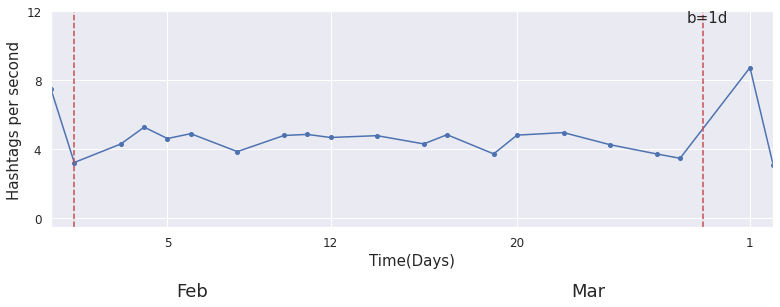

In [36]:
#ThreeMonthDays = list(range(21, 31+1))+list(range(1, 28+1))+ list(range(1, 31+1))
#have to debug this
#it used to be bug free earlier
#to find number of hashtags per second
#https://stackoverflow.com/questions/71082435/conversionerror-failed-to-convert-values-to-axis-units-2015-01-01
#potentially look into older version of script where 'date' was used to see if it also accounted for hour, minute and time or not
plt.plot(counts['noOfHashtags'].div(60*60*24), "o-", markersize=4)
plt.ylabel('Hashtags per second', fontsize=15)
plt.xlabel('Time(Days)', fontsize=15)

plt.axvline(x = pd.to_datetime("2020-02-01", format='%Y-%m-%d'), color='r', linestyle='--') # 1st of February
plt.axvline(x = pd.to_datetime("2020-02-28", format='%Y-%m-%d'), color='r', linestyle='--') # 28th of February
#plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.yticks(np.arange(0, 14, 4), fontsize = 12)
plt.xticks(counts.index[::5], counts.index.day[::5], fontsize=12)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 15) 
plt.figtext(0.25, -0.05, "Feb", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.figtext(0.75, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
plt.xlim(pd.to_datetime("2020-01-31", format='%Y-%m-%d'), pd.to_datetime("2020-03-02", format='%Y-%m-%d'))  #To be used later when have more data to focus on these months :
#draw the plot
plt.tight_layout()
plt.savefig('image4.png')
plt.show()
#Tokens per Day

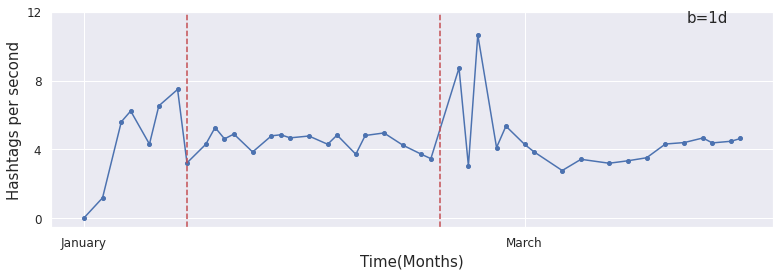

In [37]:
#ThreeMonthDays = list(range(21, 31+1))+list(range(1, 28+1))+ list(range(1, 31+1))

#to find number of hashtags per second
plt.plot(counts['noOfHashtags'].div(60*60*24), "o-", markersize=4)
plt.ylabel('Hashtags per second', fontsize=15)
plt.xlabel('Time(Months)', fontsize=15)


plt.axvline(x = pd.to_datetime("2020-02-01", format='%Y-%m-%d'), color='r', linestyle='--') # 1st of February
plt.axvline(x = pd.to_datetime("2020-02-28", format='%Y-%m-%d'), color='r', linestyle='--') # 28th of February
#plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.yticks(np.arange(0, 14, 4), fontsize = 12)
plt.xticks(counts.index[::30], counts.index.month_name()[::30], fontsize=12)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 15) 
#plt.figtext(0.25, -0.05, "Feb", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.figtext(0.75, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.xlim(pd.to_datetime("2020-01-31", format='%Y-%m-%d'), pd.to_datetime("2020-03-02", format='%Y-%m-%d'))  #To be used later when have more data to focus on these months :
#draw the plot
plt.tight_layout()
plt.savefig('image3.png')
plt.show()

In [42]:
counts.head()

TokensPerDay = comb_df.groupby(['CreatedAt'])['Hashtags'].nunique()
#type of tokens per day
TokensPerDay.index = pd.to_datetime(TokensPerDay.index)
TokensPerDay.head()

CreatedAt
2020-01-21       39
2020-01-23     5730
2020-01-25    11824
2020-01-26    13315
2020-01-28    20697
Name: Hashtags, dtype: int64

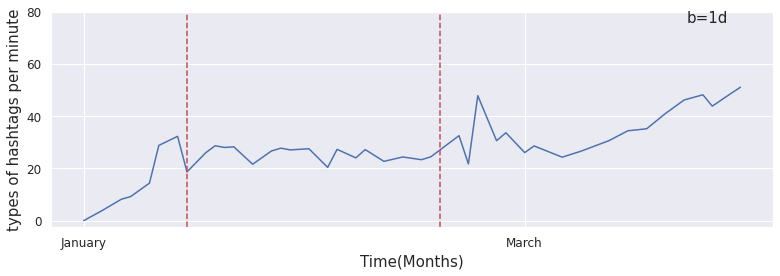

In [43]:
plt.plot(TokensPerDay.div(60*24))
plt.ylabel('types of hashtags per minute', fontsize=15)
plt.xlabel('Time(Months)', fontsize=15)

plt.axvline(x = pd.to_datetime("2020-02-01", format='%Y-%m-%d'), color='r', linestyle='--') # 1st of February
plt.axvline(x = pd.to_datetime("2020-02-28", format='%Y-%m-%d'), color='r', linestyle='--') # 28th of February
#plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.yticks(np.arange(0, 100, 20), fontsize = 12)
plt.xticks(TokensPerDay.index[::30], TokensPerDay.index.month_name()[::30], fontsize=12)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 15) 
#plt.figtext(0.25, -0.05, "Feb", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.figtext(0.75, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.xlim(pd.to_datetime("2020-01-31", format='%Y-%m-%d'), pd.to_datetime("2020-03-02", format='%Y-%m-%d'))  #To be used later when have more data to focus on these months :
#draw the plot
plt.tight_layout()
plt.savefig('image2.png')
plt.show()
#draw the plot
#Tokens per Day

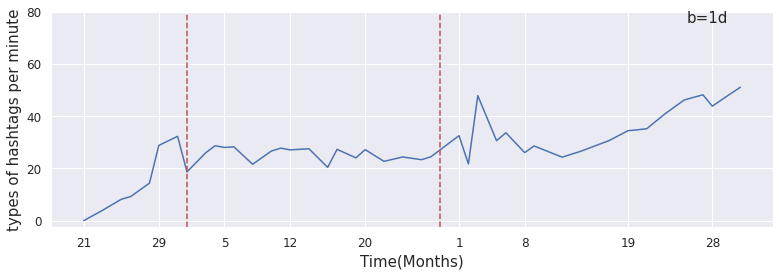

In [44]:
plt.plot(TokensPerDay.div(60*24))
plt.ylabel('types of hashtags per minute', fontsize=15)
plt.xlabel('Time(Months)', fontsize=15)

plt.axvline(x = pd.to_datetime("2020-02-01", format='%Y-%m-%d'), color='r', linestyle='--') # 1st of February
plt.axvline(x = pd.to_datetime("2020-02-28", format='%Y-%m-%d'), color='r', linestyle='--') # 28th of February
#plt.axvline(x = March_April_indices[41], color='r', linestyle='--') # 25th of April
plt.yticks(np.arange(0, 100, 20), fontsize = 12)
plt.xticks(TokensPerDay.index[::5], TokensPerDay.index.day[::5], fontsize=12)
plt.figtext(0.9, 0.9, "b=1d", wrap = True, horizontalalignment = 'center', fontsize = 15) 
#plt.figtext(0.25, -0.05, "Feb", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.figtext(0.75, -0.05, "Mar", wrap = True, horizontalalignment = 'center', fontsize = 18)
#plt.xlim(pd.to_datetime("2020-01-31", format='%Y-%m-%d'), pd.to_datetime("2020-03-02", format='%Y-%m-%d'))  #To be used later when have more data to focus on these months :
#draw the plot
plt.tight_layout()
plt.savefig('image1.png')
plt.show()
#draw the plot
#Tokens per Day

In [1]:
###zoom into week for hourly analysis

TokensPerHour = comb_df.groupby(['date'])['Hashtags'].nunique()
TokensPerHour.head()





NameError: name 'comb_df' is not defined

In [ ]:
df['TweetID'] = df['TweetID'].astype(int)

In [ ]:
#checking the occurence of different tweets

df.groupby([df.index.date, 'TweetID']).count().plot()

plt.ylabel('Number of Tweets')
#draw the plot
plt.show()

In [ ]:
# def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()
    

In [ ]:
#plot_df(df, x=df.day, title='Daily tweets')

In [ ]:
# counts = df.groupby(['date']).agg(len)

#Tokens per Day


In [ ]:
# plt.plot(counts)
# plt.ylabel('Number of Tweets')
# plt.xlabel('day')
# #draw the plot
# plt.show()
#Tweets per second plotted against day

In [ ]:
# plt.plot(df.groupby(['Date']).agg(len))
# plt.ylabel('Number of Tweets')
# plt.xlabel('day')
# #draw the plot
# plt.show()

In [ ]:
# plt.plot(df.groupby(['month']).agg(len))
# plt.ylabel('Number of Tweets')
# plt.xlabel('month')
# #draw the plot
# plt.show()
#weird result as i have data for one month but still weird as it should have some kind of dot for that month




In [ ]:
# counts1 = df.groupby(['day', 'Retweeted_ID']).size().plot()

# default_x_ticks =df['day']
# plt.xticks(default_x_ticks)
# plt.show()

#What kind of plot to use to talk about frequency of different type of tweets?
#i can use subplot or maybe legend